In [1]:


import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [3]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"
IMAGE_RES = 224

feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(IMAGE_RES, IMAGE_RES,3))

feature_extractor.trainable = False

In [4]:
model = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.Dense(5)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [5]:
(train_examples, validation_examples), info = tfds.load(
    'tf_flowers', 
    with_info=True, 
    as_supervised=True, 
    split=['train[:70%]', 'train[70%:]'],
)

num_examples = info.splits['train'].num_examples
num_classes = info.features['label'].num_classes

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [6]:
def format_image(image, label):
  image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
  return image, label

BATCH_SIZE = 32

train_batches = train_examples.shuffle(num_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)

validation_batches = validation_examples.map(format_image).batch(BATCH_SIZE).prefetch(1)

In [7]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

EPOCHS = 2
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/2
81/81 [==============================] - 112s 1s/step - loss: 0.7543 - accuracy: 0.7104 - val_loss: 0.4206 - val_accuracy: 0.8610
Epoch 2/2
81/81 [==============================] - 91s 1s/step - loss: 0.3783 - accuracy: 0.8727 - val_loss: 0.3349 - val_accuracy: 0.8910


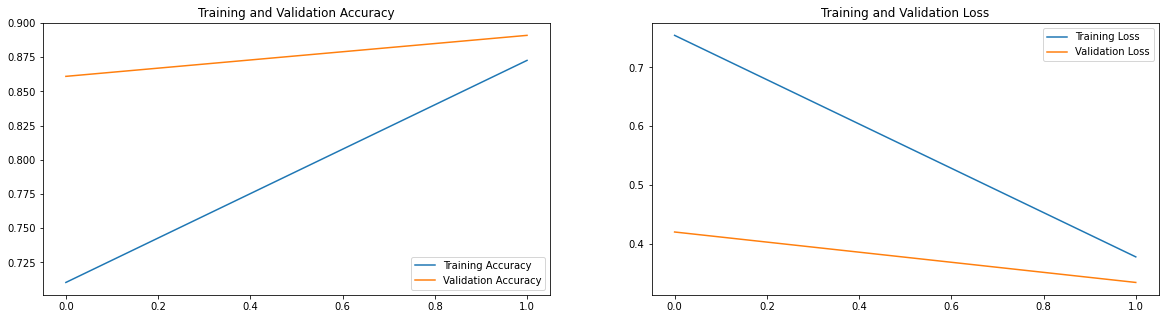

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
import numpy as np
class_names = np.array(info.features['label'].names)
class_names

array(['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses'],
      dtype='<U10')

In [12]:
image_batch, label_batch = next(iter(train_batches.take(1)))
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()


predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()
predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]
predicted_class_names

array(['tulips', 'sunflowers', 'dandelion', 'sunflowers', 'tulips',
       'sunflowers', 'roses', 'roses', 'daisy', 'dandelion', 'dandelion',
       'dandelion', 'sunflowers', 'tulips', 'tulips', 'tulips', 'roses',
       'dandelion', 'daisy', 'dandelion', 'dandelion', 'roses',
       'dandelion', 'daisy', 'dandelion', 'sunflowers', 'dandelion',
       'daisy', 'dandelion', 'daisy', 'sunflowers', 'dandelion'],
      dtype='<U10')

In [13]:
print("Labels: ", label_batch)
print("Predicted labels: ", predicted_ids)

Labels:  [2 3 0 3 2 3 4 4 3 0 0 0 3 2 2 2 4 0 1 0 0 4 0 1 0 3 0 1 0 0 3 0]
Predicted labels:  [2 3 0 3 2 3 4 4 1 0 0 0 3 2 2 2 4 0 1 0 0 4 0 1 0 3 0 1 0 1 3 0]


In [16]:
c_matrix = tf.math.confusion_matrix(
    label_batch, predicted_ids, num_classes=None, weights=None, dtype=tf.dtypes.int32,
    name=None
)
print(c_matrix)

tf.Tensor(
[[12  1  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  1  0  6  0]
 [ 0  0  0  0  4]], shape=(5, 5), dtype=int32)


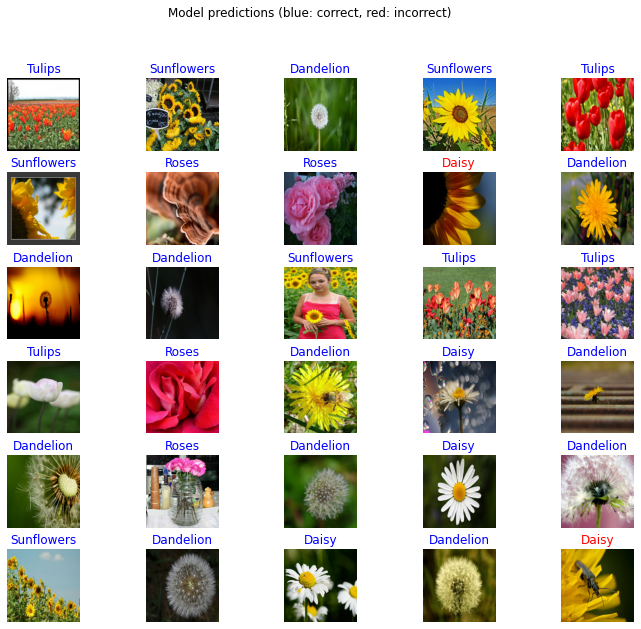

In [17]:
plt.figure(figsize=(12,10))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

In [ ]:
#inception_v3 model

In [19]:
URL = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/2"
IMAGE_RES = 224

feature_extractor2 = hub.KerasLayer(URL,
                                   input_shape=(IMAGE_RES, IMAGE_RES,3))

feature_extractor2.trainable = False

In [20]:
model2 = tf.keras.Sequential([
  feature_extractor2,
  tf.keras.layers.Dense(5)
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 2048)              21802784  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 10245     
Total params: 21,813,029
Trainable params: 10,245
Non-trainable params: 21,802,784
_________________________________________________________________


In [21]:
model2.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

EPOCHS = 2
history = model2.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/2
81/81 [==============================] - 378s 5s/step - loss: 0.7768 - accuracy: 0.7081 - val_loss: 0.5054 - val_accuracy: 0.8238
Epoch 2/2
81/81 [==============================] - 382s 5s/step - loss: 0.4254 - accuracy: 0.8497 - val_loss: 0.4037 - val_accuracy: 0.8556


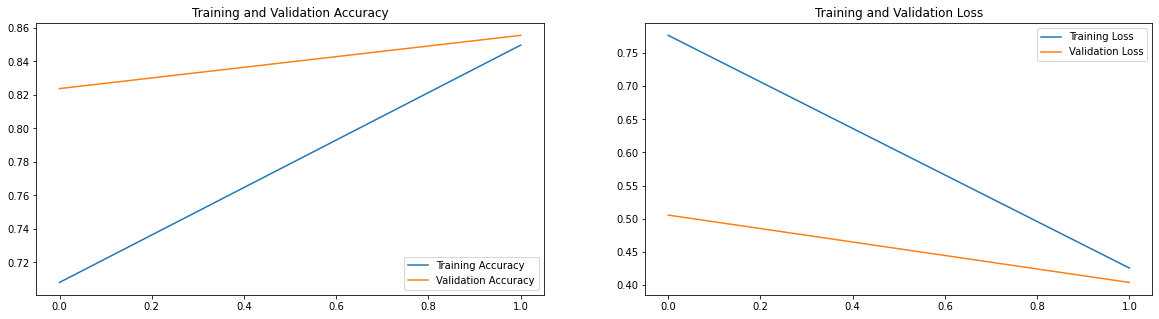

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
import numpy as np
class_names = np.array(info.features['label'].names)
class_names

array(['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses'],
      dtype='<U10')

In [25]:
image_batch, label_batch = next(iter(train_batches.take(1)))
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()


predicted_batch = model2.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()
predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]
predicted_class_names

array(['dandelion', 'daisy', 'tulips', 'roses', 'dandelion', 'daisy',
       'dandelion', 'sunflowers', 'sunflowers', 'tulips', 'dandelion',
       'daisy', 'dandelion', 'tulips', 'tulips', 'tulips', 'dandelion',
       'tulips', 'roses', 'roses', 'sunflowers', 'dandelion', 'dandelion',
       'dandelion', 'dandelion', 'tulips', 'roses', 'tulips', 'tulips',
       'roses', 'dandelion', 'sunflowers'], dtype='<U10')

In [26]:
print("Labels: ", label_batch)
print("Predicted labels: ", predicted_ids)

Labels:  [1 1 2 4 0 1 0 3 3 2 0 1 0 2 2 2 0 2 4 4 3 0 0 0 0 2 0 2 4 0 0 3]
Predicted labels:  [0 1 2 4 0 1 0 3 3 2 0 1 0 2 2 2 0 2 4 4 3 0 0 0 0 2 4 2 2 4 0 3]


In [27]:
c_matrix = tf.math.confusion_matrix(
    label_batch, predicted_ids, num_classes=None, weights=None, dtype=tf.dtypes.int32,
    name=None
)
print(c_matrix)

tf.Tensor(
[[10  0  0  0  2]
 [ 1  3  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  4  0]
 [ 0  0  1  0  3]], shape=(5, 5), dtype=int32)


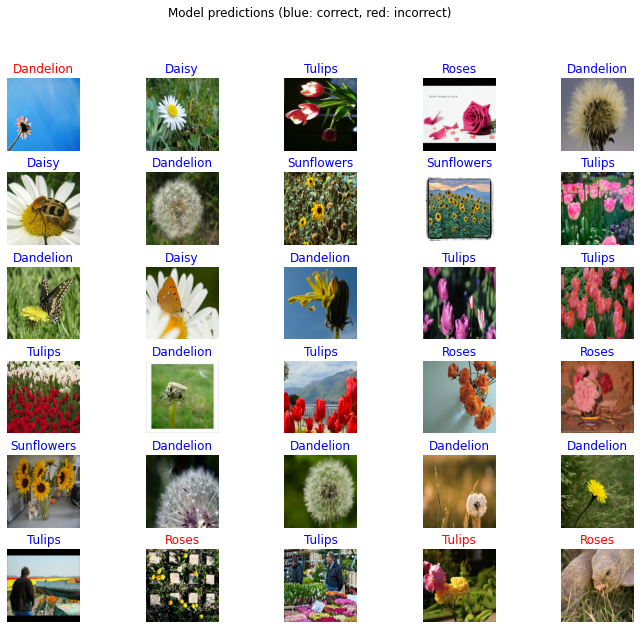

In [28]:
plt.figure(figsize=(12,10))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")